In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# --- 1) Crea rete ({Fuel, Battery} -> {Gauge};
bn = gum.BayesNet("CarBN")

def bool_var(name, desc):
    v = gum.LabelizedVariable(name, desc, 2)
    v.changeLabel(0, "F")   # False
    v.changeLabel(1, "T")   # True
    return v

In [2]:
bn.add(bool_var("F", "Fuel"))
bn.add(bool_var("B", "Battery"))
bn.add(bool_var("G", "Gauge"))

bn.addArc("F", "G")
bn.addArc("B", "G")

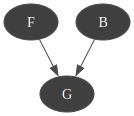

In [3]:
# --- 2) Prior e modello
# P(F), P(B)
bn.cpt("F").fillWith([0.1, 0.9])
bn.cpt("B").fillWith([0.1, 0.9])

# P(G | F, B)

bn.cpt("G")[{"B":0, "F":0}] = [0.9, 0.1]
bn.cpt("G")[{"B":0, "F":1}] = [0.8, 0.2]
bn.cpt("G")[{"B":1, "F":0}] = [0.8, 0.2]
bn.cpt("G")[{"B":1, "F":1}] = [0.2, 0.8]

# --- 3) Visualizza rete (struttura)
gnb.showBN(bn)

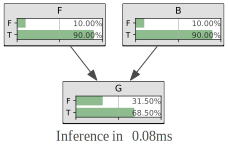

In [4]:
# --- 4) "Prior" (nessuna evidenza): nei nodi vedi le marginali a priori
gnb.showInference(bn, evs={})

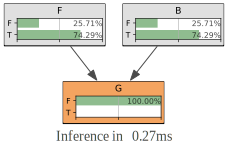

In [5]:
# --- 5) Inserisci evidenza e vedi l'aggiornamento grafico
# es: osservi Gauge = False
gnb.showInference(bn, evs={"G": 0})

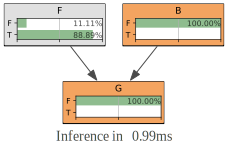

In [6]:
# es: osservi Gauge = False and Battery = False
gnb.showInference(bn, evs={"G": 0, "B": 0})

In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output

vars_ = ["F", "B", "G"]

selectors = {}
for v in vars_:
    selectors[v] = widgets.Dropdown(
        options=[("— (nessuna evidenza)", None), ("F", 0), ("T", 1)],
        value=None,
        description=v + ":",
        layout=widgets.Layout(width="200px")
    )

out = widgets.Output()

def render(_=None):
    evs = {v: selectors[v].value for v in vars_ if selectors[v].value is not None}
    with out:
        clear_output(wait=True)
        gnb.showInference(bn, evs=evs)

for v in vars_:
    selectors[v].observe(render, names="value")

ui = widgets.VBox([widgets.HBox([selectors[v] for v in vars_]), out])
display(ui)
render()
